In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('D:/Datamining/iris.csv', na_values = '?', names = ["sepal_length", "sepal_width","petal_length", "petal_width", "class"])
df = dataset

In [3]:
#資料轉換(one-hot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df[["class"]]: 
    df[col] = le.fit_transform(df[col])

In [4]:
from sklearn import cluster
from datetime import datetime

start = datetime.now()

#KMeans演算法
kmeans_fit = cluster.KMeans(n_clusters = 3, random_state = 42).fit(df) 

end = datetime.now()
time = end - start

print("分群時間：", time)

y = df['class'] 

cluster_labels = kmeans_fit.labels_

分群時間： 0:00:00.064822


In [5]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

print(purity_score(y,cluster_labels))

0.9933333333333333


In [11]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

#輸出Silhouette Coefficient指標
print("Silhouette Coefficient:",metrics.silhouette_score(df, cluster_labels, metric='euclidean'))

Silhouette Coefficient: 0.5816937070990904


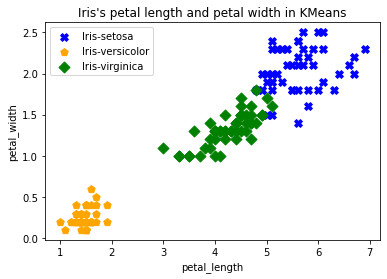

In [12]:
import matplotlib.pyplot as plt

C0 = df[cluster_labels == 0]
C1 = df[cluster_labels == 1]
C2 = df[cluster_labels == 2]


plt.scatter(C0['petal_length'],C0['petal_width'],marker='X',c="blue",s=60,label = 'Iris-setosa' )
plt.scatter(C1['petal_length'],C1['petal_width'],marker='p',c="orange",s=60, label = 'Iris-versicolor')
plt.scatter(C2['petal_length'],C2['petal_width'],marker='D',c="green",s=60,label = 'Iris-virginica')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Iris\'s petal length and petal width in KMeans')
plt.legend()
plt.show()